In [1]:
import pvdeg
from pvdeg import TEST_DATA_DIR
import pandas as pd
import os
import pickle

## Pysam

rundown on pysam...

https://nrel-pysam.readthedocs.io/en/main/inputs-from-sam.html

### PVGIS

In [2]:
weather_pvgis, meta_pvgis = pvdeg.weather.get(database="PVGIS", id=(25.783388, -80.189029))

In [3]:
results = pvdeg.standards.pysam_hourly_trivial(
    weather_df=weather_pvgis,
    meta=meta_pvgis,
)

### Local Geospatial

In [4]:
# this is just a wrapper to grab the result we want
def pysam_annual_energy(weather_df, meta):
    results = pvdeg.standards.pysam_hourly_trivial(
        weather_df=weather_pvgis,
        meta=meta_pvgis,
    )

    return results['annual_energy']

In [ ]:
GEO_META = pd.read_csv(os.path.join(TEST_DATA_DIR, "summit-meta.csv"), index_col=0)

with open(os.path.join(TEST_DATA_DIR, "summit-weather.pkl"), "rb") as f:
    GEO_WEATHER = pickle.load(f)  # unchunked

template = pvdeg.geospatial.output_template(
    ds_gids=GEO_WEATHER, 
    shapes= {
        'Annual Energy': ("gid", ),
    }
)

geo_res = pvdeg.geospatial.analysis(
    weather_ds=GEO_WEATHER,
    meta_df=GEO_META,
    func=pysam_annual_energy,
    template=template
)

In [ ]:
geo_res

## NSRDB API

broken

weather_db = 'PSM3'
weather_id = (25.783388, -80.189029)
weather_arg = {'api_key': 'DEMO_KEY',
               'email': 'user@mail.com',
               'names': 'tmy',
               'attributes': [],
               'map_variables': True}

weather_df, meta = pvdeg.weather.get(weather_db, weather_id, **weather_arg)

### Geospatial Scenario

In [5]:
location_grabber = pvdeg.scenario.GeospatialScenario()

location_grabber.addLocation(country="United States", downsample_factor=80)

/home/tford/.conda-envs/rpp/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "phony_dim_1" starting at index 500. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


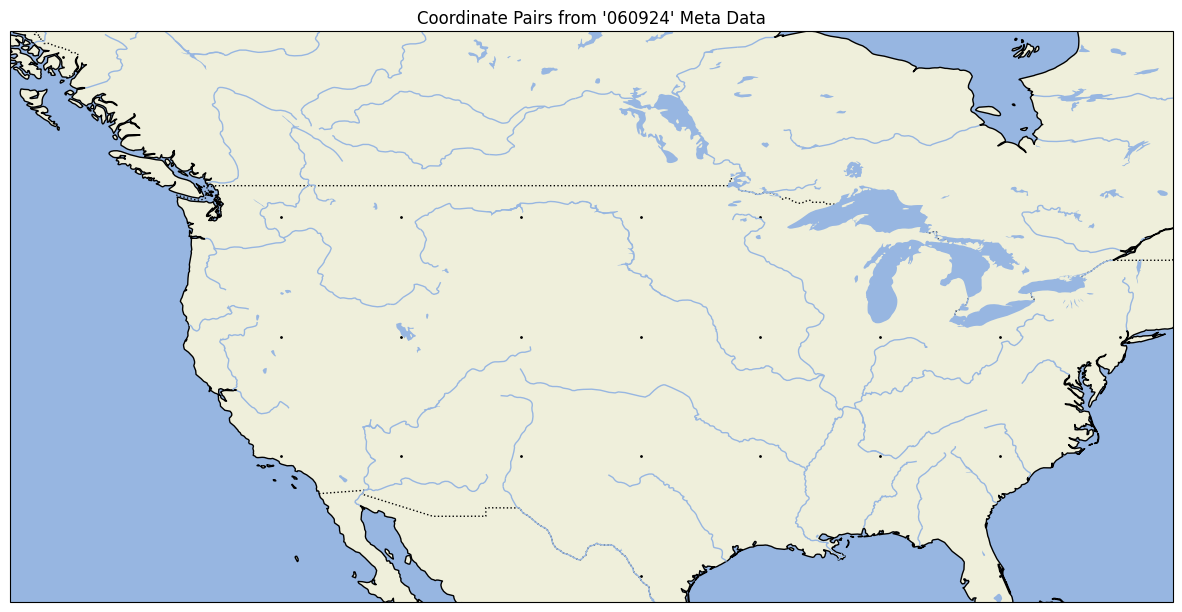

In [6]:
location_grabber.plot_coords()

In [7]:
geo_weather, geo_meta = location_grabber.geospatial_data()

template = pvdeg.geospatial.output_template(
    ds_gids=geo_weather, 
    shapes= {
        'pysam_annual_energy': ("gid", ),
    }
)

geo_res = pvdeg.geospatial.analysis(
    weather_ds=geo_weather,
    meta_df=geo_meta,
    func=pysam_annual_energy, # using wrapper from before
    template=template
)

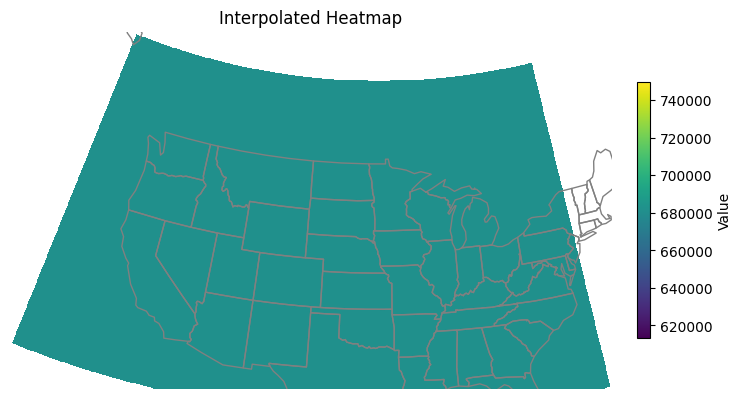

In [8]:
pvdeg.geospatial.plot_sparse_analysis(geo_res, data_var="pysam_annual_energy")